#새로운 feature로 시도

In [356]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
import pandas as pd
import numpy as np

In [358]:
path1='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/finaldata_0824_nu_all-2.xlsx'
#'/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/newdata_all_0819_normed_min.xlsx'

In [359]:
data= pd.read_excel(path1)

In [360]:
data

,x_3-2,x_4-3,y_4-3,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_15-14,y_15-14,x_16-15,y_16-15,d_ratio,sin dif,y,image
0,0.013730,0.012809,-0.000391,0.010591,-0.007104,0.001264,-0.008162,-0.001226,-0.007178,0.009940,-0.007748,-0.002149,-0.008704,-0.003215,-0.007260,-0.008992,-0.005652,-0.006409,-0.003961,6.275347,-1.359156e-05,1,correct18.MP4_000003.040.jpg
1,0.013872,0.012782,-0.000433,0.009899,-0.007601,0.001281,-0.008214,-0.001177,-0.007313,0.009502,-0.008042,-0.001872,-0.009495,-0.003689,-0.008518,-0.008944,-0.006595,-0.006970,-0.004992,4.564632,-1.715147e-05,1,correct18.MP4_000003.160.jpg
2,0.116926,0.093571,-0.002151,0.084516,-0.045402,0.013020,-0.061673,-0.013559,-0.064367,0.091630,-0.047467,-0.008853,-0.068489,-0.024995,-0.059683,-0.049372,-0.050698,-0.042431,-0.034752,5.007295,-3.021811e-01,1,correct18.MP4_000003.281.jpg
3,0.115006,0.105220,0.006920,0.066537,-0.074469,0.004632,-0.070392,-0.011684,-0.057457,0.059887,-0.081961,-0.023267,-0.073425,-0.029949,-0.049818,-0.057207,-0.058195,-0.042380,-0.035394,2.360753,-9.722381e-02,1,correct18.MP4_000003.400.jpg
4,0.112020,0.101939,0.008908,0.078198,-0.049214,0.007220,-0.066179,-0.018551,-0.060107,0.081753,-0.044583,-0.000928,-0.075393,-0.020552,-0.059859,-0.024373,-0.070635,-0.025609,-0.048101,2.336987,-1.976772e-01,1,correct18.MP4_000003.640.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.017029,0.012231,-0.001163,0.010635,-0.006686,0.005534,-0.005760,0.004455,-0.005318,0.009462,-0.006402,0.000796,-0.004625,0.000838,-0.003517,-0.008783,-0.002477,-0.006815,-0.000442,4.044143,-4.235492e-06,0,not_correct6.mp4_000006.387.jpg
1990,0.014851,0.011693,-0.001179,0.008800,-0.006568,0.005562,-0.005068,0.005500,-0.004315,0.009620,-0.005844,0.000232,-0.003914,0.000544,-0.002441,-0.007676,-0.002627,-0.005856,-0.000655,2.341872,-2.141895e-06,0,not_correct6.mp4_000006.454.jpg
1991,0.013734,0.010166,-0.000538,0.009729,-0.006292,0.005774,-0.004519,0.005288,-0.003653,0.009216,-0.005892,0.003020,-0.004148,0.002211,-0.003023,-0.006191,-0.003245,-0.005109,-0.001396,9.443710,-7.090232e-06,0,not_correct6.mp4_000006.521.jpg
1992,0.012786,0.010690,-0.001966,0.006897,-0.005614,0.004112,-0.005037,0.003732,-0.004500,0.005770,-0.005421,-0.001342,-0.003776,-0.000339,-0.002928,-0.008039,-0.001928,-0.005606,-0.000363,1.877143,1.708545e-07,0,not_correct6.mp4_000006.588.jpg


In [361]:
data.columns

Index(['x_3-2', 'x_4-3', 'y_4-3', 'x_6-5', 'y_6-5', 'x_7-6', 'y_7-6', 'x_8-7',
       'y_8-7', 'x_10-9', 'y_10-9', 'x_11-10', 'y_11-10', 'x_12-11', 'y_12-11',
       'x_15-14', 'y_15-14', 'x_16-15', 'y_16-15', 'd_ratio', 'sin dif', 'y',
       'image'],
      dtype='object')

In [362]:
#RobustScaler: outlier 많은 경우 -> boxplot 보고 결정
#StandardScaler: 거리 기반 알고리즘
#MinMaxScaler: gradient descent 알고리즘

In [363]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [364]:
path2='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/finaldata_0824_nu_correct7.xlsx'

In [365]:
path3='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/finaldata_0824_nu_notcorrect7.xlsx'

In [366]:
testdata = pd.read_excel(path2)
testdata
new_x1 = testdata.drop(['y','image'], axis=1)
#y = data["y"]

In [367]:
new_x1=scaler.fit_transform(new_x1)

In [368]:
testdata = pd.read_excel(path3)
testdata
new_x2 = testdata.drop(['y','image'], axis=1)
#y = data["y"]

In [369]:
new_x2=scaler.fit_transform(new_x2)

##올바르지 않은

In [370]:
vector0= data[data['y']==0]

In [371]:
len(vector0)

453

In [372]:
#vector0.drop(['Unnamed: 0', 'y','image'], axis=1, inplace=True)
vector0.drop(['y','image'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##올바른

In [373]:
vector1= data[data['y']==1]

In [374]:
len(vector1)

1541

In [375]:
#vector1.drop(['Unnamed: 0', 'y','image'], axis=1, inplace=True)
vector1.drop(['y','image'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#LSTM

데이터셋 분리

In [376]:
from sklearn.model_selection import train_test_split

In [377]:
vector0 = np.array(vector0)
vector1 = np.array(vector1)
len(vector0), len(vector1)
vector0.shape, vector1.shape

((453, 21), (1541, 21))

In [378]:
#x0_train.shape, x0_test.shape
x0_test = vector0

In [379]:
x1_train = vector1[:int(0.7*len(vector1))]
x1_test = vector1[int(0.7*len(vector1)):]

In [380]:
x1_train.shape, x1_test.shape

((1078, 21), (463, 21))

비정상 :1, 정상: 0 으로 testset 구성

In [381]:
x0_test_tot = np.hstack((x0_test, np.ones(x0_test.shape[0]).reshape(-1,1)))
x1_test_tot = np.hstack((x1_test, np.zeros(x1_test.shape[0]).reshape(-1,1)))
test_tot = np.vstack((x0_test_tot, x1_test_tot))

In [382]:
x_test, x_valid, y_test, y_valid = train_test_split(test_tot[:,:-1], test_tot[:,-1], test_size=0.3)

정규화

In [383]:
x1_train = scaler.fit_transform(pd.DataFrame(x1_train))
x1_train = np.array(x1_train)

In [384]:
x_test = scaler.fit_transform(pd.DataFrame(x_test))
x_test = np.array(x_test)

In [385]:
x_valid = scaler.fit_transform(pd.DataFrame(x_valid))
x_valid = np.array(x_valid)

In [386]:
print(x1_train.shape, x_test.shape, x_valid.shape)

(1078, 21) (641, 21) (275, 21)


데이터 차원 변경

In [387]:
x1_train =x1_train.reshape(x1_train.shape[0],1,x1_train.shape[1])
x_test =x_test.reshape(x_test.shape[0],1,x_test.shape[1])
x_valid =x_valid.reshape(x_valid.shape[0],1,x_valid.shape[1])

In [388]:
print(x1_train.shape,x_test.shape,x_valid.shape)

(1078, 1, 21) (641, 1, 21) (275, 1, 21)


신경망 구축

In [389]:
from keras import regularizers
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector

In [390]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    # return_sequences 가 True면 각 time_steps의 셀이 모두 출력으로 내보냄 , False 면 최종 셀만 출력으로 내보냄
    L1 = LSTM(140, activation='sigmoid', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(70, activation='sigmoid', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(140, activation='sigmoid', return_sequences=True)(L3)
    L5 = LSTM(70, activation='sigmoid', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [391]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 1, 21)]           0         
_________________________________________________________________
lstm_72 (LSTM)               (None, 1, 140)            90720     
_________________________________________________________________
lstm_73 (LSTM)               (None, 70)                59080     
_________________________________________________________________
repeat_vector_18 (RepeatVect (None, 1, 70)             0         
_________________________________________________________________
lstm_74 (LSTM)               (None, 1, 140)            118160    
_________________________________________________________________
lstm_75 (LSTM)               (None, 1, 70)             59080     
_________________________________________________________________
time_distributed_18 (TimeDis (None, 1, 21)             149

In [392]:
model = autoencoder_model(x1_train)
model.compile(optimizer='adam',loss='mse')

In [393]:
epochs=100
batch_size=10
callbacks=[EarlyStopping(monitor='val_loss',patience=5)]
history = model.fit(x1_train, x1_train, epochs=epochs, batch_size= batch_size,callbacks = callbacks, validation_split=0.05).history

Epoch 1/100
103/103 [==============================] - 6s 19ms/step - loss: 1.0437 - val_loss: 0.3540
Epoch 2/100
103/103 [==============================] - 1s 10ms/step - loss: 0.9940 - val_loss: 0.2349
Epoch 3/100
103/103 [==============================] - 1s 9ms/step - loss: 0.8084 - val_loss: 0.1368
Epoch 4/100
103/103 [==============================] - 1s 9ms/step - loss: 0.6697 - val_loss: 0.0970
Epoch 5/100
103/103 [==============================] - 1s 10ms/step - loss: 0.5790 - val_loss: 0.0882
Epoch 6/100
103/103 [==============================] - 1s 9ms/step - loss: 0.5167 - val_loss: 0.0768
Epoch 7/100
103/103 [==============================] - 1s 9ms/step - loss: 0.4811 - val_loss: 0.0801
Epoch 8/100
103/103 [==============================] - 1s 9ms/step - loss: 0.4546 - val_loss: 0.0735
Epoch 9/100
103/103 [==============================] - 1s 9ms/step - loss: 0.4381 - val_loss: 0.0720
Epoch 10/100
103/103 [==============================] - 1s 9ms/step - loss: 0.4279 - val

In [394]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

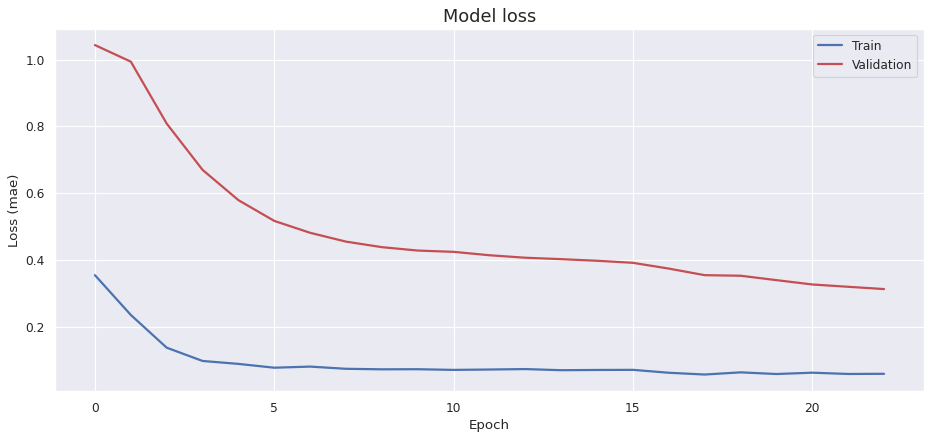

In [395]:
# 학습 손실 시각화
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['val_loss'], 'b', label='Train', linewidth=2)
ax.plot(history['loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [396]:
from sklearn import metrics

validation

130
precision:  0.5793103448275863 , recall:  0.5793103448275863
threshold:  0.09313015721729083


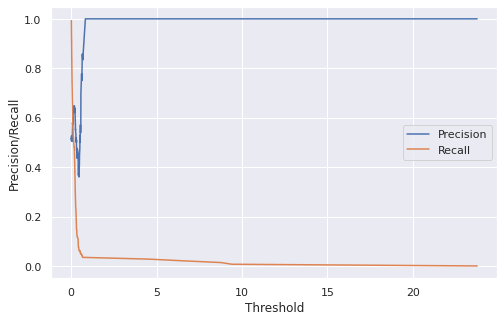

In [397]:
#검증 데이터 입력
predictions_3d = model.predict(x_valid)
predictions = predictions_3d.reshape(predictions_3d.shape[0], predictions_3d.shape[2])
x_valid_ = x_valid.reshape(x_valid.shape[0], x_valid.shape[2])

#재구성 손실 값 도출
mse = np.mean(np.power(x_valid_ - predictions, 2), axis = 1)

error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': y_valid})

precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error']) ##auc curve 사용 말고 다른 방법

#모델 최적의 threshold 값 찾기
best_cnt_dic = abs(precision_rt - recall_rt)
threshold_fixed = threshold_rt[np.argmin(best_cnt_dic)]  #둘의 차가 최소가 될때가 threshold
print(np.argmin(best_cnt_dic))
print('precision: ', precision_rt[np.argmin(best_cnt_dic)], ', recall: ', recall_rt[np.argmin(best_cnt_dic)])
print('threshold: ', threshold_fixed)

plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label = 'Precision')
plt.plot(threshold_rt, recall_rt[1:], label = 'Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

모델 성능 평가

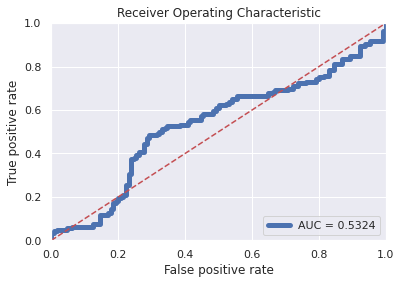

In [398]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, mse)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc, linewidth=5)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

prediction

     Reconstruction_error  True_class
0                0.062602         0.0
1                0.089438         1.0
2                0.196181         0.0
3                0.112364         1.0
4                0.029657         1.0
..                    ...         ...
636              0.339335         0.0
637              0.043137         0.0
638              0.628504         0.0
639              0.048780         0.0
640              0.084754         1.0

[641 rows x 2 columns]
accuracy:  [0.53822153]


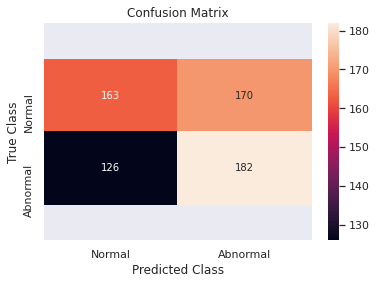

In [399]:
test_predictions_3d = model.predict(x_test)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0], test_predictions_3d.shape[2])
x_test_ = x_test.reshape(x_test.shape[0], x_test.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': y_test})
print(error_df)

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]
conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)

accuracy = (conf_matrix[0][0]+ conf_matrix[1][[1]])/conf_matrix.sum()
print('accuracy: ',accuracy)

sns.heatmap(conf_matrix, xticklabels=['Normal','Abnormal'], yticklabels=['Normal', 'Abnormal'], annot=True, fmt='d', annot_kws={'size':10})
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

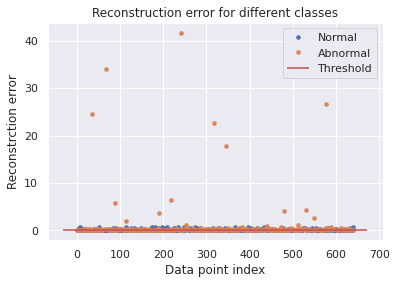

In [400]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
  ax.plot(group.index, group.Reconstruction_error, marker = 'o', ms=3.5, linestyle='',
          label='Abnormal' if name ==1 else 'Normal')

ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors ='r', zorder=100, label ='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")  
plt.ylabel("Reconstrction error")
plt.xlabel("Data point index")
plt.show()

새로운 데이터 예측

In [401]:
new_x1= np.array(new_x1)
new_x1 =new_x1.reshape(new_x1.shape[0],1,new_x1.shape[1])

new_x1.shape

(15, 1, 21)

In [402]:
#올바른 젓가락질
test_predictions_3d = model.predict(new_x1)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0], test_predictions_3d.shape[2])
x_test_ = new_x1.reshape(new_x1.shape[0], new_x1.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse})

print(error_df)

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

print(pred_y)

correct=0
notcorrect=0
for i in pred_y:
  if i == 0 :
    correct+=1
  else:
    notcorrect+=1

ratio_o=correct/len(pred_y)
ratio_x=notcorrect/len(pred_y)
if correct > notcorrect :
  print("{0:0.3f} :: 올바른 젓가락질입니다.".format(ratio_o))
elif correct == notcorrect:
  print("재촬영해주세요")
else:
  print("{0:0.3f} :: 올바르지 않은 젓가락질입니다.".format(ratio_x))

    Reconstruction_error
0               0.941727
1               0.336428
2               0.520273
3               1.036012
4               0.666044
5               1.078733
6               0.629003
7               0.304194
8               0.275572
9               0.436320
10              0.458659
11              0.250757
12              0.340253
13              0.447805
14              0.870947
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.000 :: 올바르지 않은 젓가락질입니다.


In [403]:
new_x2= np.array(new_x2)
new_x2 =new_x2.reshape(new_x2.shape[0],1,new_x2.shape[1])

new_x2.shape

(36, 1, 21)

In [404]:
#올바르지 않은
test_predictions_3d = model.predict(new_x2)
test_predictions = test_predictions_3d.reshape(test_predictions_3d.shape[0], test_predictions_3d.shape[2])
x_test_ = new_x2.reshape(new_x2.shape[0], new_x2.shape[2])
mse = np.mean(np.power(x_test_ - test_predictions, 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse})

print(error_df)

pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

print(pred_y)

correct=0
notcorrect=0
for i in pred_y:
  if i == 0 :
    correct+=1
  else:
    notcorrect+=1

ratio_o=correct/len(pred_y)
ratio_x=notcorrect/len(pred_y)
if correct > notcorrect :
  print("{0:0.3f} :: 올바른 젓가락질입니다.".format(ratio_o))
elif correct == notcorrect:
  print("재촬영해주세요")
else:
  print("{0:0.3f} :: 올바르지 않은 젓가락질입니다.".format(ratio_x))

    Reconstruction_error
0               0.411477
1               0.222686
2               0.111932
3               0.750940
4               0.212638
5               0.131527
6               0.143938
7               0.208736
8               0.110883
9               0.268073
10              0.101336
11              0.289169
12              0.481431
13              0.356707
14              0.479055
15              0.612688
16              0.218825
17              0.245352
18              0.228353
19              0.464155
20              0.444305
21              0.428642
22              0.305174
23              0.168791
24              0.201391
25              2.013754
26              0.639944
27              0.295159
28              0.376368
29              0.757783
30              0.212843
31              0.231690
32              0.337255
33              0.893414
34              0.909802
35              0.353253
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[sin] 0.56 0.48 \
[d_ratio & sin] 0.66 0.56 \
[d_ratio] 0.65 0.55 \
[all] 0.63 0.56 \
[normed_min] 0.75 0.62